## Problem statement - Fake News Classifier
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate or false information acquires a tremendous potential to cause real world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. . The sensationalism of not-so-accurate eye catching and intriguing headlines aimed at retaining the attention of audiences to sell information has persisted all throughout the history of all kinds of information broadcast. On social networking websites, the reach and effects of information spread are however significantly amplified and occur at such a fast pace, that distorted, inaccurate or false information acquires a tremendous potential to cause real impacts, within minutes, for millions of user


In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 

In [2]:
#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
fake_news = pd.read_csv('E://dataset//dataset//fakenews//Fake_news//Fake.csv')
true_news = pd.read_csv('E://dataset//dataset//fakenews//Fake_news//True.csv')

In [5]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_news.shape

(23481, 4)

In [8]:
true_news.shape

(21417, 4)

In [9]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


### Dataset Details
This metadata has two csv files where one dataset contains fake news and the other contains true/real news and has nearly 23481 fake news and 21417 true news

### Description of columns in the file:

1.title- contains news headlines

2.text-contains news content

3.subject- type of news

4.date- date the news was published

### Preprocessing and Cleaning
We have to perform  preprocessing steps before performing EDA.

In [11]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [12]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

In [13]:
#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

In [14]:
#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [31]:
#Converting the date columns to datetime format
fake_news['date'].value_counts()

May 10, 2017                                                                                                                                             46
May 6, 2016                                                                                                                                              44
May 26, 2016                                                                                                                                             44
May 5, 2016                                                                                                                                              44
May 11, 2016                                                                                                                                             43
                                                                                                                                                         ..
December 19, 2017                                               

In [42]:
fake_news = fake_news.replace(to_replace=r'^https?HOST?:\/\/.*[\r\n]*',value='',regex=True)

fake_news.head()

,subject,date,news,output
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0


In [43]:
fake_news['date'].value_counts()

May 10, 2017         46
May 6, 2016          44
May 5, 2016          44
May 26, 2016         44
May 11, 2016         43
                     ..
November 12, 2017     1
Jul 18, 2015          1
Jun 21, 2015          1
November 19, 2017     1
Jul 19, 2015          1
Name: date, Length: 1676, dtype: int64

In [44]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

In [45]:
#Appending two datasets
frames = [fake_news, true_news]
new_dataset = pd.concat(frames)
new_dataset

,subject,date,news,output
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1


In [48]:
clean_news=new_dataset.copy()
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends out embarrassing new year’...,0
1,News,2017-12-31,drunk bragging trump staffer started russian ...,0
2,News,2017-12-30,sheriff david clarke becomes an internet joke...,0
3,News,2017-12-29,trump is so obsessed he even has obama’s name...,0
4,News,2017-12-25,pope francis just called out donald trump dur...,0


In [49]:
#preprocessing the data
from nltk.corpus import stopwords
stop = stopwords.words('english')
clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends embarrassing new year’s eve...,0
1,News,2017-12-31,drunk bragging trump staffer started russian c...,0
2,News,2017-12-30,sheriff david clarke becomes internet joke thr...,0
3,News,2017-12-29,trump obsessed even obama’s name coded website...,0
4,News,2017-12-25,pope francis called donald trump christmas spe...,0


In [68]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(9.7,6.27)},style="darkgrid")

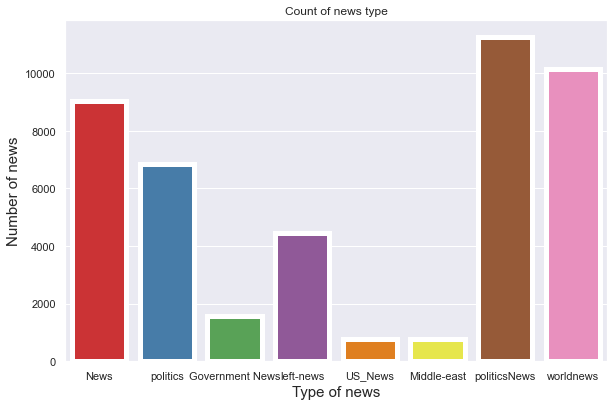

In [69]:
ax = sns.countplot(x="subject", data=clean_news,linewidth=5, palette='Set1')
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [71]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [77]:
#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)
for word, freq in common_words:
    print('word:', word, ':', 'count:',freq)

word: trump : count: 140400
word: said : count: 130258
word: us : count: 68081
word: would : count: 55422
word: president : count: 53189
word: people : count: 41718
word: one : count: 36146
word: state : count: 33190
word: new : count: 31799
word: also : count: 31209
word: obama : count: 29881
word: clinton : count: 29003
word: house : count: 28716
word: government : count: 27392
word: donald : count: 27376
word: reuters : count: 27348
word: states : count: 26331
word: republican : count: 25287
word: could : count: 24356
word: white : count: 23823


Text(0.5, 1.0, 'Count of fake and true news')

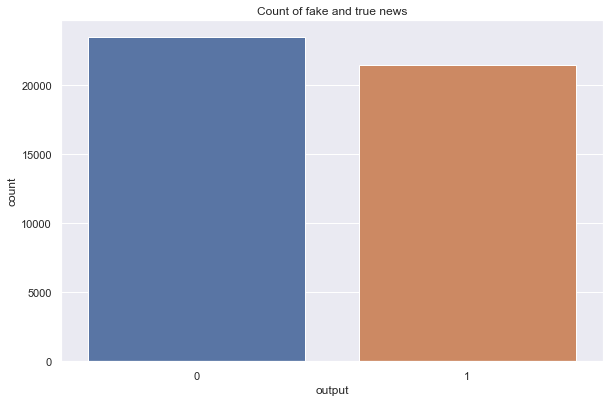

In [79]:
##seaborn countplot
import matplotlib.pyplot as plt
sns.countplot(x="output", data=clean_news)
plt.title("Count of fake and true news")

In [80]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [81]:
#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)
for word, freq in common_words:
    print('word:', word, ':', 'count:',freq)

word: trump : count: 140400
word: said : count: 130258
word: us : count: 68081
word: would : count: 55422
word: president : count: 53189
word: people : count: 41718
word: one : count: 36146
word: state : count: 33190
word: new : count: 31799
word: also : count: 31209
word: obama : count: 29881
word: clinton : count: 29003
word: house : count: 28716
word: government : count: 27392
word: donald : count: 27376
word: reuters : count: 27348
word: states : count: 26331
word: republican : count: 25287
word: could : count: 24356
word: white : count: 23823


In [82]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [83]:
#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)
for word, freq in common_words:
    print('word:', word, ':', 'count:',freq)

word: trump : count: 140400
word: said : count: 130258
word: us : count: 68081
word: would : count: 55422
word: president : count: 53189
word: people : count: 41718
word: one : count: 36146
word: state : count: 33190
word: new : count: 31799
word: also : count: 31209
word: obama : count: 29881
word: clinton : count: 29003
word: house : count: 28716
word: government : count: 27392
word: donald : count: 27376
word: reuters : count: 27348
word: states : count: 26331
word: republican : count: 25287
word: could : count: 24356
word: white : count: 23823


In [84]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

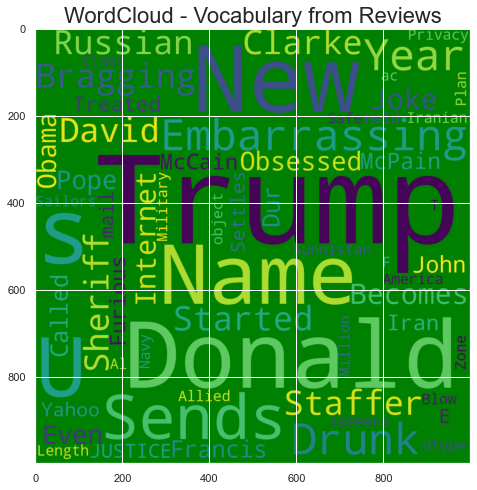

In [86]:
text = fake_news["news"]
wordcloud = WordCloud(background_color = 'green', width = 1000, height = 1000, stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

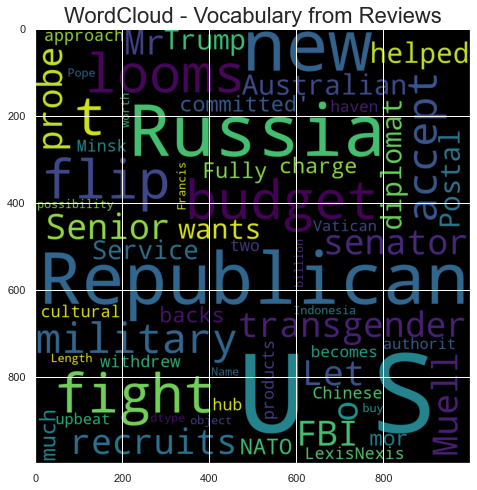

In [88]:
text = true_news["news"]
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000, stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [89]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas spe...


### Stemming 
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. 

For example,
history->histori
Finally->fina

If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming

In [91]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

In [92]:
#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)  

In [93]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

### TFIDF(Term Frequency — Inverse Document Frequency)
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.
Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the news.

In [94]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44897, 5000)

In [95]:
#Getting the target variable
y=clean_news['output']

### Word2Vec -- Vectorization 
Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.
Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

In [96]:
import gensim

In [ ]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method 
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)